In [44]:
%pylab
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
plot(np.arange(10))

In [14]:
close()

In [15]:
# matplotlib的图像都位于Figure对象汇总，用plt.figure创建一个新的Figure
fig = plt.figure() # 会有一个空窗口

In [16]:
#不能通过空Figure绘图，必须使用add_subplot创建一个或多个subplot才行
ax1 = fig.add_subplot(2, 2, 1) # 图像2*2，选择当前4个subplot中的第一个，编号从1开始
# 创建后面两个subplot
ax2 = fig.add_subplot(2, 2, 2) # AxesSubplot对象
ax3 = fig.add_subplot(2, 2, 3)

In [17]:
# 此时用绘图命令，matplotlib会在最后一个用过的subplot（如果没有则创建一个）上进行绘制
plt.plot(np.random.randn(50).cumsum(), 'k--') # 会在第三个图上绘制一个虚线

In [18]:
# 在其他格子里画图
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.55)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
# 重复执行命令会在原有基础上覆盖图像

In [19]:
# 由于经常用Figure和Subplot创建布局，所以定了plt.subplots更简单的方法
# 创建一个Figure，并返回一个含有已创建的subplot对象的NumPy数组
fig, axes = plt.subplots(2, 3)
axes # 可以轻松地对axes数组进行索引 axes[0, 1], sharex和sharey指定subplot应该具有相同的X轴或Y轴

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A75B510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0AAC9470>]], dtype=object)

In [20]:
# subplot_adjust(left=None, bottom=None, right=None, top=None,wsapce=None, hspace=None)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.1, hspace=0) # 宽度和高度间距的百分比，如果为1则间距一个图像大小

In [21]:
# 颜色、标记、线型
plt.plot(np.random.randn(20).cumsum(), 'ko--')
# 等同 plt.plot(np.random.randn(20).cumsum(), color='k', linestyle='--', marker='o')

In [22]:
# 在线型图中，非实际数据点默认按线性方式插值，可以通过drawstyle选项修改：
data = np.random.randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

plt.legend(loc='best') # 插图说明

## 刻度、标签和图例
大多数图表装饰项，主要方法：
- 使用过程型的pyplot接口（类似MATLAB）
- 更为面向对象的原生matplotlib API

pyplot接口设计的目的就是交互式使用：
- xlim 控制图标的范围
- xticks 刻度位置
- xticklabels 刻度标签

使用方式，两种：
- 调用时不带参数，则返回当前的参数值。例如，plt.xlim()返回当前X轴绘图范围。对应subplot对象的方法，例如ax.get_xlim。
- 调用时带参数，则设置参数值。因此，plt.xlim([0, 10])会将X轴的范围设置为0到10。对应subplot对象的方法，例如ax.set_xlim。

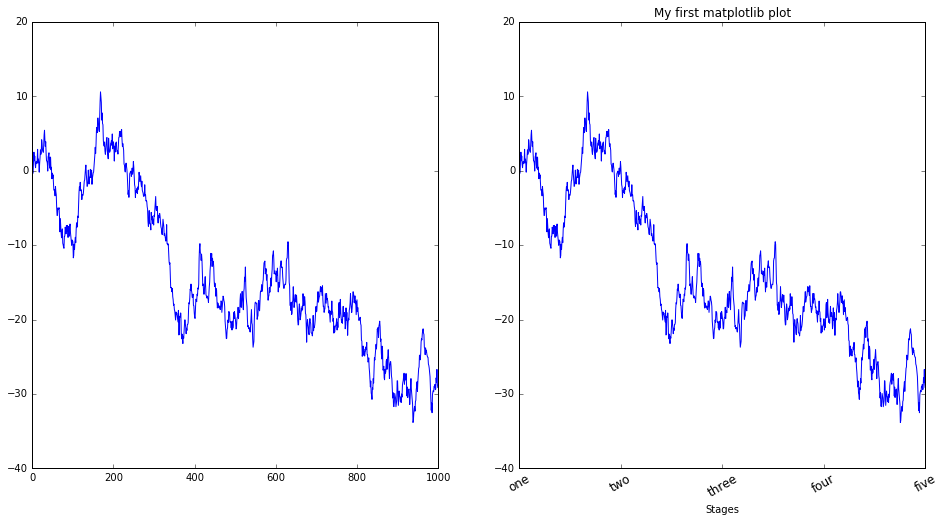

In [34]:
# 设置标题、轴标签、刻度以及刻度标签
fig = plt.figure(figsize=(16,8)); ax1 = fig.add_subplot(1, 2, 1); ax2 = fig.add_subplot(1, 2, 2)
data = np.random.randn(1000)

ax1.plot(data.cumsum())

# 告诉matplotlib刻度放在数据范围中的哪些位置
ticks = ax2.set_xticks([0, 250, 500, 750, 1000])
# 将任何其他值用作标签
labels = ax2.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                           rotation=30, fontsize='large')
# 为X轴设置一个名称，并用set_title设置标题
ax2.set_title('My first matplotlib plot')
ax2.set_xlabel('Stages')
ax2.plot(data.cumsum())

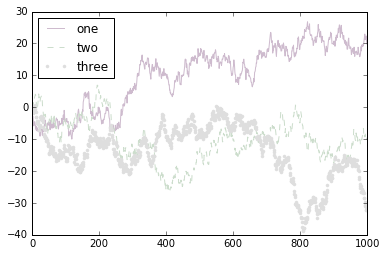

In [41]:
# 添加图例（legend）

# 第一种，天假subplot的时候传入label参数
fig = plt.figure();ax = fig.add_subplot(1, 1, 1)

ax.plot(np.random.randn(1000).cumsum(), 'k', color='#CEBBCE', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'k--', color='#CCDDCC',label='two')
ax.plot(np.random.randn(1000).cumsum(), 'k.', color='#DEDEDE',label='three')

# 调用ax.legend或plt.legend()来自动创建图例
ax.legend(loc='best')

## 注解以及在Subplot上绘图
> 除了标准的图表对象以外，绘制一些自定义的注解（比如文本、箭头或其他图形等）。

注解可以通过text、arrow和annotata等函数进行添加。
- text可以将文本绘制在图表的指定坐标(x, y)，还可加自定义格式

```python
ax.text(x, y, 'Hello world!', family='monospace', fontsize=12)
```

注解中既可以含有文本也可以含有箭头。

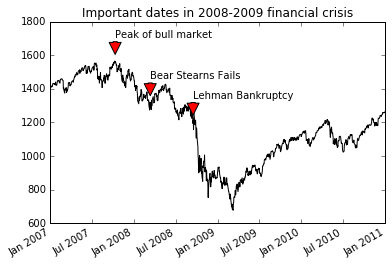

In [45]:
# 根据2007年以来的标准普尔500指数收盘价格（来自yahoo!fiance）绘制一张曲线图
# 并标出2008年到2009年金融危机期间的一些重要日期
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('old-file/ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50),
               xytext=(date, spx.asof(date) + 200),
               arrowprops=dict(facecolor='red'),
               horizontalalignment='left', verticalalignment='top')
    
# 放大到2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in 2008-2009 financial crisis')